# Train a LSTM network to predict next word


In [1]:
import sys
print(sys.executable)

C:\Users\DELL\Anaconda3\envs\nlp\python.exe


In [14]:
#import tensorflow
#from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
import tensorflow.keras.utils as keras_utils

import pandas as pd
import numpy as np
import string, os 

import random

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Dataset creation

## Read data from a text file

In [46]:
import os
print(os.listdir(os.getcwd()))
print(os.path.join(os.getcwd(),'nlp_data'))
os.path.isfile(os.path.join(os.getcwd(),'cat.JPG'))

['.ipynb_checkpoints', '11_NLP.ipynb', '11_NLP.txt', 'cat.jpg', 'cats_and_dogs_filtered', 'cats_and_dogs_filtered.zip', 'cats_and_dogs_filtered.zip.1', 'cat_vs_dog_clf.h5', 'cat_vs_dog_clf.ipynb', 'cnn_layers_output_visualization.ipynb', 'dogcat_model_bak.h5', 'generate_bag_of_words.ipynb', 'images', 'images.tar.gz', 'mnistTest.ipynb', 'mnist_clf.ipynb', 'next_word_prediction.ipynb', 'NLP-Introduction-01(Introduction).ipynb', 'nlp_data', 'object_detection.ipynb', 'paulgraham.txt', 'segmentation.ipynb', 'Tensorflow-Bi-LSTM.ipynb', 'U-Net_with_Pretrained_MobileNetV2_as_Encoder.ipynb', 'unet-segmentation.ipynb']
C:\Users\DELL\mnist\nlp_data


True

In [47]:
all_sentences= []

f = open('C:\\Users\\DELL\\mnist\\paulgraham.txt','r')
txt = f.read().replace("\n"," ")
sent_text = nltk.sent_tokenize(''.join(txt.strip()))
for k in sent_text :
  all_sentences.append(k)

In [4]:
print(len(all_sentences))

1175


In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_sentences)
total_words = len(tokenizer.word_index) + 1

In [49]:
print(total_words)

1857


In [50]:
input_sequences = []
for sent in all_sentences:
    token_list = tokenizer.texts_to_sequences([sent])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        print(n_gram_sequence)

[859, 860]
[859, 860, 67]
[859, 860, 67, 55]
[859, 860, 67, 55, 544]
[859, 860, 67, 55, 544, 129]
[859, 860, 67, 55, 544, 129, 56]
[859, 860, 67, 55, 544, 129, 56, 8]
[859, 860, 67, 55, 544, 129, 56, 8, 861]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862, 183]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862, 183, 2]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862, 183, 2, 97]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862, 183, 2, 97, 4]
[859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862, 183, 2, 97, 4, 30]
[36, 130]
[36, 130, 70]
[36, 130, 70, 3]
[36, 130, 70, 3, 73]
[36, 130, 70, 3, 73, 43]
[36, 130, 70, 3, 73, 43, 61]
[36, 130, 70, 3, 73, 43, 61, 36]
[36, 130, 70, 3, 73, 43, 61, 36, 545]
[36, 130, 70, 3, 73, 43, 61, 36, 545, 70]
[36, 130, 70, 3, 73, 43, 61, 36, 545, 70, 3]
[36, 130, 70, 3, 73, 43, 61, 36, 545, 70, 3, 73]
[36, 130, 70, 3, 73, 43, 61, 36, 545, 70, 3, 73, 43]
[36, 130, 70

[16, 195, 41, 6, 143, 1196, 9, 465, 3]
[16, 195, 41, 6, 143, 1196, 9, 465, 3, 645]
[16, 195, 41, 6, 143, 1196, 9, 465, 3, 645, 1]
[16, 195, 41, 6, 143, 1196, 9, 465, 3, 645, 1, 342]
[16, 195, 41, 6, 143, 1196, 9, 465, 3, 645, 1, 342, 700]
[8, 2]
[8, 2, 23]
[8, 2, 23, 1]
[8, 2, 23, 1, 32]
[8, 2, 23, 1, 32, 5]
[8, 2, 23, 1, 32, 5, 26]
[8, 2, 23, 1, 32, 5, 26, 6]
[8, 2, 23, 1, 32, 5, 26, 6, 493]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35, 2]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35, 2, 97]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35, 2, 97, 4]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35, 2, 97, 4, 75]
[8, 2, 23, 1, 32, 5, 26, 6, 493, 139, 35, 2, 97, 4, 75, 330]
[5, 117]
[5, 117, 14]
[5, 117, 14, 98]
[5, 117, 14, 98, 11]
[5, 117, 14, 98, 11, 494]
[5, 117, 14, 98, 11, 494, 63]
[5, 117, 14, 98, 11, 494, 63, 88]
[5, 117, 14, 98, 11, 494, 63, 88, 61]
[5, 117, 14, 98, 11, 494, 63, 88, 61, 19]
[5, 117, 14, 98, 11, 494, 63, 8

[181, 1426, 218, 360, 3, 32, 657, 2]
[181, 1426, 218, 360, 3, 32, 657, 2, 788]
[7, 15]
[7, 15, 21]
[7, 15, 21, 95]
[7, 15, 21, 95, 21]
[7, 15, 21, 95, 21, 117]
[7, 15, 21, 95, 21, 117, 523]
[7, 15, 21, 95, 21, 117, 523, 1427]
[7, 15, 21, 95, 21, 117, 523, 1427, 10]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7, 1428]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7, 1428, 5]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7, 1428, 5, 3]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7, 1428, 5, 3, 1429]
[7, 15, 21, 95, 21, 117, 523, 1427, 10, 7, 1428, 5, 3, 1429, 65]
[2, 69]
[2, 69, 23]
[2, 69, 23, 6]
[2, 69, 23, 6, 14]
[2, 69, 23, 6, 14, 1430]
[2, 69, 23, 6, 14, 1430, 3]
[2, 69, 23, 6, 14, 1430, 3, 11]
[2, 69, 23, 6, 14, 1430, 3, 11, 1431]
[2, 69, 23, 6, 14, 1430, 3, 11, 1431, 45]
[2, 69, 23, 6, 14, 1430, 3, 11, 1431, 45, 51]
[2, 69, 23, 6, 14, 1430, 3, 11, 1431, 45, 51, 1432]
[2, 69, 23, 6, 14, 1430, 3, 11, 1431, 45, 51, 1432, 104]
[2, 69, 23, 6, 14, 1430, 3, 11, 143

[5, 99, 8, 1, 349, 4, 29, 818, 385, 1, 282, 104, 3, 26, 7, 40, 856, 744, 786]
[5, 99, 8, 1, 349, 4, 29, 818, 385, 1, 282, 104, 3, 26, 7, 40, 856, 744, 786, 5]
[5, 99, 8, 1, 349, 4, 29, 818, 385, 1, 282, 104, 3, 26, 7, 40, 856, 744, 786, 5, 3]
[5, 99, 8, 1, 349, 4, 29, 818, 385, 1, 282, 104, 3, 26, 7, 40, 856, 744, 786, 5, 3, 1816]
[5, 99, 8, 1, 349, 4, 29, 818, 385, 1, 282, 104, 3, 26, 7, 40, 856, 744, 786, 5, 3, 1816, 10]
[279, 10]
[279, 10, 6]
[279, 10, 6, 90]
[279, 10, 6, 90, 79]
[279, 10, 6, 90, 79, 1817]
[279, 10, 6, 90, 79, 1817, 9]
[279, 10, 6, 90, 79, 1817, 9, 1]
[279, 10, 6, 90, 79, 1817, 9, 1, 268]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158, 1818]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158, 1818, 8]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158, 1818, 8, 1819]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158, 1818, 8, 1819, 1820]
[279, 10, 6, 90, 79, 1817, 9, 1, 268, 539, 158, 18

In [51]:
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

45


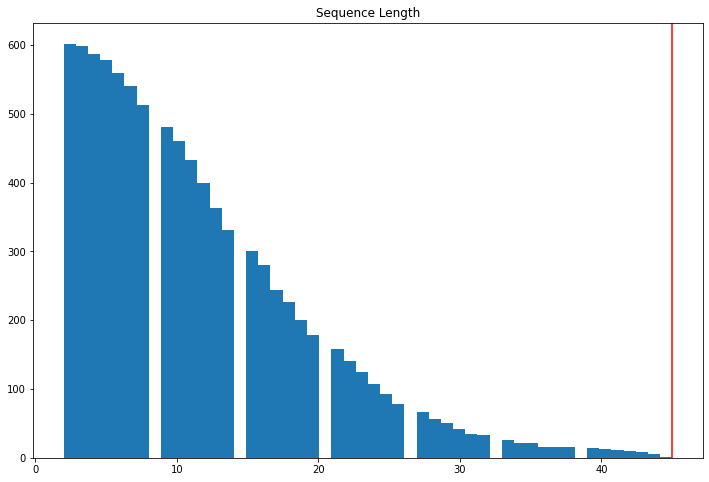

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.hist([len(x) for x in input_sequences], bins=50)
plt.axvline(max_sequence_len, c="r")
plt.title("Sequence Length")
plt.show()

In [54]:
max_sequence_len=45

In [55]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [56]:
print(input_sequences)

[[  0   0   0 ...   0 859 860]
 [  0   0   0 ... 859 860  67]
 [  0   0   0 ... 860  67  55]
 ...
 [  0   0   0 ...   6 210  14]
 [  0   0   0 ... 210  14  98]
 [  0   0   0 ...  14  98 166]]


In [57]:
X, y = input_sequences[:,:-1],input_sequences[:,-1]

In [58]:
y

array([860,  67,  55, ...,  14,  98, 166])

In [59]:
y = keras_utils.to_categorical(y, num_classes=total_words)

In [60]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
X.shape

(9034, 44)

In [62]:
np.save("/content/drive/My Drive/Colab Notebooks/X.npy", X)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/X.npy'

In [21]:
y.shape

(17154, 2967)

In [0]:
np.save("/content/drive/My Drive/Colab Notebooks/y.npy", y)

Group that as functions :

In [63]:
def sequence_n_grams(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = sequence_n_grams(all_sentences)
inp_sequences[:10]

[[859, 860],
 [859, 860, 67],
 [859, 860, 67, 55],
 [859, 860, 67, 55, 544],
 [859, 860, 67, 55, 544, 129],
 [859, 860, 67, 55, 544, 129, 56],
 [859, 860, 67, 55, 544, 129, 56, 8],
 [859, 860, 67, 55, 544, 129, 56, 8, 861],
 [859, 860, 67, 55, 544, 129, 56, 8, 861, 36],
 [859, 860, 67, 55, 544, 129, 56, 8, 861, 36, 862]]

In [64]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(input_sequences)

NameError: name 'ku' is not defined

In [25]:
predictors.shape

(17154, 34)

In [26]:
label.shape

(17154, 2967)

# Create & Train the model

## Creating the model

In [41]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 10)            29670     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2967)              299667    
Total params: 373,737
Trainable params: 373,737
Non-trainable params: 0
_________________________________________________________________


## Helper function to generate text after the end of each epoch 

In [0]:
text = txt.split()
text = text[:-2500]

def on_epoch_end(epoch, logs): 
    print()
    text
    seed_text = random.choice(text)
    print('----- Generating text after Epoch: % d' % epoch)
    print('----- Generating with seed: "'+ seed_text+'"') 
    print() 
    for _ in range(50):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    print(seed_text.title(),"\n")
print_callback = LambdaCallback(on_epoch_end = on_epoch_end)

## Defining a helper function to save the model after each epoch in which the loss decreases

In [0]:
filepath = "/content/drive/My Drive/Colab Notebooks/nw_prediction.h5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss', 
							verbose = 1, save_best_only = True, 
							mode ='min')

In [0]:
callbacks = [print_callback, checkpoint]

## Load model from saved file to re-train if exits

In [50]:
model_exist_path = '/content/drive/My Drive/Colab Notebooks/nw_prediction.h5'
if os.path.isfile(model_exist_path):
    print("Loading an existing model...\n")
    model.reset_states()
    model = load_model(model_exist_path)

Loading an existing model...



In [51]:
model.fit(X, y, batch_size=64, epochs=100, callbacks = callbacks )

Epoch 1/100
17154/17154 [==============================] - 18s 1ms/step - loss: 1.5366

----- Generating text after Epoch:  0
----- Generating with seed: "their"

Their Lives Are Another Shifted Is The Real World Is To Be That Is That They Were A Couple More Daring Of Ago It Was An Alien Concept Of Which Insights Was 62 25 To 29 Bracket And It Because It Teaches The Same Way For The Job But That The 


Epoch 00001: loss improved from inf to 1.53661, saving model to /content/drive/My Drive/Colab Notebooks/nw_prediction.h5
Epoch 2/100
17154/17154 [==============================] - 18s 1ms/step - loss: 1.5329

----- Generating text after Epoch:  1
----- Generating with seed: "29"

29 Of The Most Visible The Big Companies Of The 20Th Century The Big Companies Were Just Insights By Michael Drifting Like This Anti State Of Jobs Old Employees Was During The 20Th Century For The 20Th Century Apples But The Century World Was Increased On The Days Of A Liability 


Epoch 00002: loss improved fro

# Generate text

In [0]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [55]:
generate_text("Physics seems", 9, model, max_sequence_len)

'Physics Seems To Have Exams With The Fall Semester After Christmas'